In [1]:
import sys

sys.path.append("../..")

In [2]:
import logging

import torch
import matplotlib.pyplot as plt

from emgrep.datasets.dataloader import Dataloader

In [3]:
logging.basicConfig(level=logging.INFO)

In [4]:
dataloader = Dataloader(
    sec_len=3000,
    positives="subject",
    block_len=300,
    block_stride=300, 
    days=[1, 2], 
    times=[1, 2],
)

In [5]:
ds_sample = dataloader.inter_subject_data(data_path="../../data/01_raw/", subjects=[1, 2])

INFO:root:Getting sequences for 1 at day 1 at time 1.
INFO:root:Getting sequences for 1 at day 1 at time 2.
INFO:root:Getting sequences for 1 at day 2 at time 1.
INFO:root:Getting sequences for 1 at day 2 at time 2.
INFO:root:Getting sequences for 2 at day 1 at time 1.
INFO:root:Getting sequences for 2 at day 1 at time 2.
INFO:root:Getting sequences for 2 at day 2 at time 1.
INFO:root:Getting sequences for 2 at day 2 at time 2.


In [6]:
len(ds_sample)

3400

In [7]:
# get the first sample
sample = ds_sample[0]

anchor, pos, info = sample

x, y = anchor
px, py = pos

info

IndexError: list index out of range

In [ ]:
x.shape, y.shape

(torch.Size([10, 300, 16]), torch.Size([10, 300]))

/var/folders/vn/89j8g3p55gb71ngxshtbg1r80000gn/T/ipykernel_90964/1007482417.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{i/2000}s" for i in ax.get_xticks()])


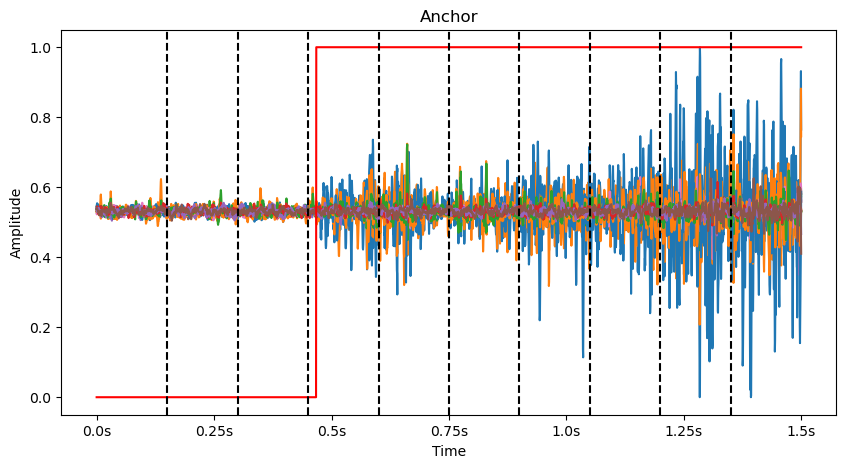

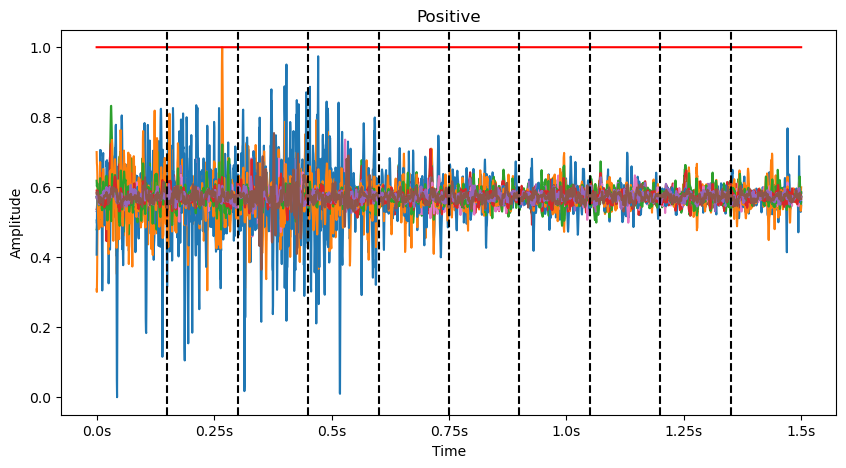

In [ ]:
def plot_samples(signals, labels, title, block_size=300):
    signals = signals.reshape(-1, signals.shape[-1])
    labels = labels.reshape(-1)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # normalize the signals to [0, 1]
    signals = (signals - signals.min()) / (signals.max() - signals.min())

    ax.plot(signals)
    ax.plot(labels, color="red")    
    
    # plot the block boundaries
    for i in range(1, len(signals) // block_size):
        ax.axvline(x=i * block_size, color="black", linestyle="--")
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")

    ax.set_xticklabels([f"{i/2000}s" for i in ax.get_xticks()])

    ax.set_title(title)
    plt.show()

plot_samples(x, y, "Anchor")
plot_samples(px, py, "Positive")